In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,ZeroPadding2D
from keras.models import Model
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


*VERY IMPORTANT NOTE*

**Another possibility is to use deep learning algorithms. In this research paper the authors demonstrate that convolutional neural networks (CNN) trained for classification purposes can be used to extract a ‘neural code’ for images. These neural codes are the features used to describe images. It also demonstrates that it performs as well as state of the art approaches on many datasets. The problem about this approach is that we first need labelled data to train the neural network. The labelling task can be costly and time consuming. Another way to generate these ‘neural codes’ for our image retrieval task is to use an unsupervised deep learning algorithm. This is where the denoising autoencoder comes.**

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
xtrain=xtrain.astype(np.float32)/255
xtest=xtest.astype(np.float32)/255

In [4]:
xtrain=xtrain.reshape((-1,28,28,1))
xtest=xtest.reshape((-1,28,28,1))

In [5]:
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)

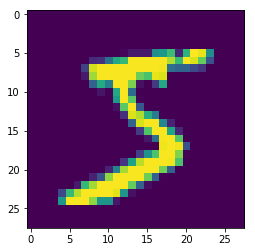

In [6]:
plt.imshow(xtrain[0].reshape((28,28)))

In [7]:
plt.imshow(xtrain_noisy[0].reshape(28,28))

NameError: name 'xtrain_noisy' is not defined

In [8]:
xtrain_noisy=xtrain+(0.5)*np.random.normal(loc=0.0,scale=1.0,size=xtrain.shape)
xtest_noisy=xtest+(0.5)*np.random.normal(loc=0.0,scale=1.0,size=xtest.shape)

In [9]:
xtrain_noisy=np.clip(xtrain_noisy,0,1)
xtest_noisy=np.clip(xtest_noisy,0,1)

In [10]:
xtrain_noisy=xtrain_noisy.reshape((-1,28,28,1))
xtest_noisy=xtest_noisy.reshape((-1,28,28,1))

In [11]:
inp=Input((28,28,1))
x=Conv2D(16,3,activation='relu',padding='same')(inp)
x=MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x= Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded=MaxPooling2D((2,2))(x)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
x.get_shape()

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(8)])

In [13]:
encoder=Model(inp,encoded)


In [14]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 8)           0         
Total para

In [15]:
encoded.get_shape()

TensorShape([Dimension(None), Dimension(3), Dimension(3), Dimension(8)])

In [16]:
x1=Conv2D(8,3,activation='relu',padding='same')(encoded)
x2=UpSampling2D((2,2))(x1)
x2=ZeroPadding2D(padding=((1,0),(1,0)))(x2)
x=Conv2D(8,3,activation='relu',padding='same')(x2)
x=UpSampling2D((2,2))(x)
x=Conv2D(16,3,activation='relu',padding='same')(x)
x=UpSampling2D()(x)
decoded=Conv2D(1,3,activation='sigmoid',padding='same')(x)

In [17]:
decoded.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [18]:
x2.get_shape()

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(8)])

In [19]:
encoder=Model(inp,encoded)

In [20]:
autoencoder=Model(inp,decoded)

In [21]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 8)           0         
__________

In [22]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [23]:
autoencoder.fit(xtrain_noisy,xtrain,batch_size=32,epochs=10,verbose=1,shuffle=True,validation_data=(xtest_noisy,xtest))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.1979 - val_loss: 0.1563
Epoch 2/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.1498 - val_loss: 0.1417
Epoch 3/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1396 - val_loss: 0.1366
Epoch 4/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.1339 - val_loss: 0.1302
Epoch 5/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.1302 - val_loss: 0.1282
Epoch 6/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1277 - val_loss: 0.1248
Epoch 7/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.1261 - val_loss: 0.1239
Epoch 8/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1249 - val_loss: 0.1232
Epoch 9/10
60000/60000 [======================

In [24]:
pred_test=autoencoder.predict(xtest_noisy[:10])

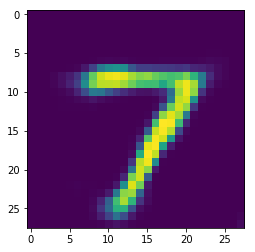

In [25]:
plt.imshow(pred_test[0].reshape((28,28)))

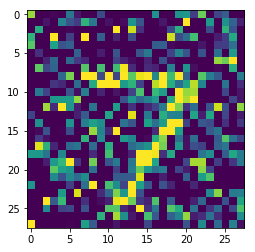

In [26]:
plt.imshow(xtest_noisy[0].reshape((28,28)))

In [27]:
learned_codes=encoder.predict(xtrain)

In [28]:
learned_codes=learned_codes.reshape((-1,3*3*8))

In [29]:
learned_codes.shape

(60000, 72)

In [30]:
learned_codes[0]

array([5.1620474, 0.8796825, 1.7523757, 2.069735 , 4.514601 , 0.5361551,
       0.       , 0.850331 , 4.526868 , 1.1584215, 4.309495 , 2.9128122,
       4.397597 , 2.1170251, 0.       , 3.3407652, 2.7908974, 2.5645847,
       4.1082883, 2.4836679, 2.8099668, 2.5672586, 0.       , 2.4005752,
       3.7996168, 2.1497288, 0.706801 , 1.7569336, 3.2542613, 0.       ,
       0.       , 0.7054484, 4.0015054, 1.5822039, 5.59266  , 2.8822882,
       3.3564377, 0.       , 0.       , 4.258004 , 1.2087386, 3.9867675,
       5.0424643, 3.4130886, 4.291529 , 0.       , 0.       , 5.3950686,
       3.536719 , 1.6078441, 1.5100881, 3.0330186, 4.3911724, 0.       ,
       0.       , 2.4021704, 3.3025248, 2.434706 , 6.0534697, 4.7669234,
       3.0675552, 0.       , 0.       , 3.277619 , 1.4037882, 3.991483 ,
       4.5803246, 2.2274218, 0.6235359, 0.       , 0.       , 1.6862265],
      dtype=float32)

In [31]:
testcodes=encoder.predict(xtest)

In [32]:
testcodes=testcodes.reshape((-1,3*3*8))

In [33]:
from sklearn.metrics import label_ranking_average_precision_score

In [34]:
ytrue=np.array([[1,1,0,0]])

In [35]:
yscore=np.array([[28,10,1,0.5]])

In [36]:
label_ranking_average_precision_score(ytrue,yscore)

1.0

In [37]:
yscore=np.array([[28,10,20,0.5]])

In [38]:
label_ranking_average_precision_score(ytrue,yscore)

0.8333333333333333

In [39]:
#Scoring model


In [40]:
ytrain[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
#we want our model to predict high score for similar images and less score for non similar images
# that will give us high precision

In [42]:
ytrain1=np.argmax(ytrain,axis=1)
        
        

In [43]:
ytrain1[0]

5

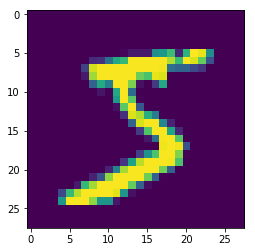

In [44]:
plt.imshow(xtrain[0].reshape((28,28)))

In [45]:
codec1=encoder.predict(xtrain[0].reshape((1,28,28,1)))

In [46]:
codec1=codec1.reshape(-1,)

In [47]:
codec1.shape

(72,)

In [48]:
testcodecs=encoder.predict(xtest)

In [49]:
testcodecs=testcodecs.reshape((-1,3*3*8))

In [50]:
testcodecs.shape

(10000, 72)

In [51]:
testcodecs[0].shape

(72,)

In [52]:
score_index=[(np.linalg.norm(codec1-testcodecs[i]),i) for i in range(len(testcodecs))]

In [53]:
sorted_i=sorted(score_index,key=lambda x:x[0])

In [54]:
first_10=[x[1] for x in sorted_i[:10]]

In [55]:
first_10

[9428, 4902, 7475, 1693, 9298, 3995, 5229, 5325, 9545, 2525]

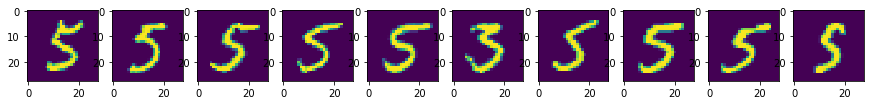

In [56]:
fig,axes=plt.subplots(1,10)
fig.set_figheight(15)
fig.set_figwidth(15)
count=0
for ax in axes:
    ax.imshow(xtest[first_10[count]].reshape((28,28)))
    count+=1

In [57]:
# Workds good